## 探索电影数据集

在这个项目中，你将尝试使用所学的知识，使用 `NumPy`、`Pandas`、`matplotlib`、`seaborn` 库中的函数，来对电影数据集进行探索。

下载数据集：
[TMDb电影数据](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/tmdb-movies.csv)



数据集各列名称的含义：
<table>
<thead><tr><th>列名称</th><th>id</th><th>imdb_id</th><th>popularity</th><th>budget</th><th>revenue</th><th>original_title</th><th>cast</th><th>homepage</th><th>director</th><th>tagline</th><th>keywords</th><th>overview</th><th>runtime</th><th>genres</th><th>production_companies</th><th>release_date</th><th>vote_count</th><th>vote_average</th><th>release_year</th><th>budget_adj</th><th>revenue_adj</th></tr></thead><tbody>
 <tr><td>含义</td><td>编号</td><td>IMDB 编号</td><td>知名度</td><td>预算</td><td>票房</td><td>名称</td><td>主演</td><td>网站</td><td>导演</td><td>宣传词</td><td>关键词</td><td>简介</td><td>时常</td><td>类别</td><td>发行公司</td><td>发行日期</td><td>投票总数</td><td>投票均值</td><td>发行年份</td><td>预算（调整后）</td><td>票房（调整后）</td></tr>
</tbody></table>


**请注意，你需要提交该报告导出的 `.html`、`.ipynb` 以及 `.py` 文件。**



---

---

## 第一节 数据的导入与处理

在这一部分，你需要编写代码，使用 Pandas 读取数据，并进行预处理。


**任务1.1：** 导入库以及数据

1. 载入需要的库 `NumPy`、`Pandas`、`matplotlib`、`seaborn`。
2. 利用 `Pandas` 库，读取 `tmdb-movies.csv` 中的数据，保存为 `movie_data`。

提示：记得使用 notebook 中的魔法指令 `%matplotlib inline`，否则会导致你接下来无法打印出图像。

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

movie_data = pd.read_csv('./tmdb-movies.csv')

---

**任务1.2: ** 了解数据

你会接触到各种各样的数据表，因此在读取之后，我们有必要通过一些简单的方法，来了解我们数据表是什么样子的。

1. 获取数据表的行列，并打印。
2. 使用 `.head()`、`.tail()`、`.sample()` 方法，观察、了解数据表的情况。
3. 使用 `.dtypes` 属性，来查看各列数据的数据类型。
4. 使用 `isnull()` 配合 `.any()` 等方法，来查看各列是否存在空值。
5. 使用 `.describe()` 方法，看看数据表中数值型的数据是怎么分布的。



In [20]:
#print(movie_data.head())
#print(movie_data.tail())
#print(movie_data.sample())
#print(movie_data.dtypes)
#print(movie_data.isnull().sum())
#print(movie_data.any())
#print(movie_data.describe())

---

**任务1.3: ** 清理数据

在真实的工作场景中，数据处理往往是最为费时费力的环节。但是幸运的是，我们提供给大家的 tmdb 数据集非常的「干净」，不需要大家做特别多的数据清洗以及处理工作。在这一步中，你的核心的工作主要是对数据表中的空值进行处理。你可以使用 `.fillna()` 来填补空值，当然也可以使用 `.dropna()` 来丢弃数据表中包含空值的某些行或者列。

任务：使用适当的方法来清理空值，并将得到的数据保存。

In [23]:
#movie_data = movie_data.fillna(0)

# new，根据后面会使用到的col，针对性的清除数据。如果使用到的col非NaN条数不等于正常数据大小，则判定其需要处理。
# 非常感谢老师辛苦的审阅！
movie_data = movie_data.dropna(subset=['director', 'genres'])

# display(movie_data)
movie_data.info()
# 注释，过于激进的数据过滤
# for col in movie_data.columns:
#     coltype = movie_data[col].dtypes
#     if coltype == 'int64' or coltype == 'float64':
#         movie_data = movie_data[movie_data[col] != 0]
        
# movie_data = movie_data.reset_index(drop=True)
#print(movie_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 21 columns):
id                      10801 non-null int64
imdb_id                 10796 non-null object
popularity              10801 non-null float64
budget                  10801 non-null int64
revenue                 10801 non-null int64
original_title          10801 non-null object
cast                    10732 non-null object
homepage                2921 non-null object
director                10801 non-null object
tagline                 8027 non-null object
keywords                9352 non-null object
overview                10799 non-null object
runtime                 10801 non-null int64
genres                  10801 non-null object
production_companies    9807 non-null object
release_date            10801 non-null object
vote_count              10801 non-null int64
vote_average            10801 non-null float64
release_year            10801 non-null int64
budget_adj              1

---

---

## 第二节 根据指定要求读取数据


相比 Excel 等数据分析软件，Pandas 的一大特长在于，能够轻松地基于复杂的逻辑选择合适的数据。因此，如何根据指定的要求，从数据表当获取适当的数据，是使用 Pandas 中非常重要的技能，也是本节重点考察大家的内容。



---

**任务2.1: ** 简单读取

1. 读取数据表中名为 `id`、`popularity`、`budget`、`runtime`、`vote_average` 列的数据。
2. 读取数据表中前1～20行以及48、49行的数据。
3. 读取数据表中第50～60行的 `popularity` 那一列的数据。

要求：每一个语句只能用一行代码实现。

In [10]:
#print(movie_data[['id', 'popularity', 'budget', 'runtime', 'vote_average']])
#print(movie_data.loc[:, ['id', 'popularity', 'budget', 'runtime', 'vote_average']])

#print(movie_data.iloc[np.r_[np.arange(1, 21), [48, 49]]])
print(movie_data.loc[[50, 60], ['popularity']])

    popularity
50    2.883233
60    2.487849


---

**任务2.2: **逻辑读取（Logical Indexing）

1. 读取数据表中 **`popularity` 大于5** 的所有数据。
2. 读取数据表中 **`popularity` 大于5** 的所有数据且**发行年份在1996年之后**的所有数据。

提示：Pandas 中的逻辑运算符如 `&`、`|`，分别代表`且`以及`或`。

要求：请使用 Logical Indexing实现。

In [11]:
#print(movie_data[movie_data['popularity'] > 5])
#print(movie_data[(movie_data['popularity'] > 5) & (movie_data['release_year'] > 1996)])

---

**任务2.3: **分组读取

1. 对 `release_year` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `revenue` 的均值。
2. 对 `director` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `popularity` 的均值，从高到低排列。

要求：使用 `Groupby` 命令实现。

In [12]:
#print(movie_data['revenue'].groupby(movie_data['release_year']).agg('mean'))
#print(movie_data['popularity'].groupby(movie_data['director']).agg('mean').sort_values(ascending=False))

#betten
display(movie_data.groupby('release_year')['revenue'].agg('mean'))

release_year
1960    4.531406e+06
1961    1.089420e+07
1962    6.736870e+06
1963    5.511911e+06
1964    8.118614e+06
1965    1.308805e+07
1966    1.842102e+06
1967    1.844587e+07
1968    6.788025e+06
1969    7.869583e+06
1970    1.366395e+07
1971    7.362011e+06
1972    1.236825e+07
1973    2.225420e+07
1974    1.728808e+07
1975    2.176114e+07
1976    1.704267e+07
1977    3.825584e+07
1978    2.107353e+07
1979    2.955781e+07
1980    2.267516e+07
1981    2.164154e+07
1982    3.035116e+07
1983    2.884412e+07
1984    2.510023e+07
1985    2.638323e+07
1986    2.481635e+07
1987    2.769684e+07
1988    2.579001e+07
1989    3.770017e+07
1990    4.026641e+07
1991    3.538797e+07
1992    4.570040e+07
1993    3.907388e+07
1994    3.856212e+07
1995    5.232195e+07
1996    4.074261e+07
1997    5.549569e+07
1998    4.520559e+07
1999    5.069515e+07
2000    4.836432e+07
2001    5.541357e+07
2002    5.505120e+07
2003    5.387275e+07
2004    5.470301e+07
2005    4.537592e+07
2006    3.989152e+07


---

---

## 第三节 绘图与可视化

接着你要尝试对你的数据进行图像的绘制以及可视化。这一节最重要的是，你能够选择合适的图像，对特定的可视化目标进行可视化。所谓可视化的目标，是你希望从可视化的过程中，观察到怎样的信息以及变化。例如，观察票房随着时间的变化、哪个导演最受欢迎等。

<table>
<thead><tr><th>可视化的目标</th><th>可以使用的图像</th></tr></thead><tbody>
 <tr><td>表示某一属性数据的分布</td><td>饼图、直方图、散点图</td></tr>
 <tr><td>表示某一属性数据随着某一个变量变化</td><td>条形图、折线图、热力图</td></tr>
 <tr><td>比较多个属性的数据之间的关系</td><td>散点图、小提琴图、堆积条形图、堆积折线图</td></tr>
</tbody></table>

在这个部分，你需要根据题目中问题，选择适当的可视化图像进行绘制，并进行相应的分析。对于选做题，他们具有一定的难度，你可以尝试挑战一下～

**任务3.1：**对 `popularity` 最高的20名电影绘制其 `popularity` 值。

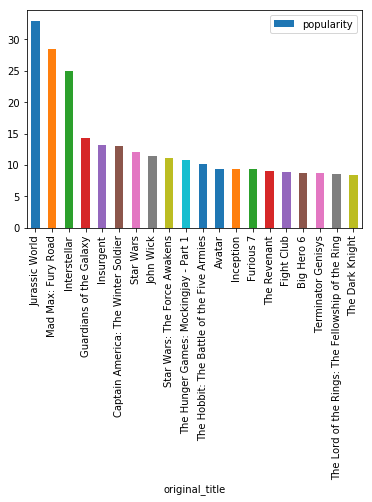

In [13]:
% matplotlib inline
movie_data_sort_by_popularity = movie_data.sort_values(by='popularity', ascending=False)[0: 20].reset_index(drop=True)
#print(popularity)
movie_data_sort_by_popularity.plot.bar(x = 'original_title', y = 'popularity')

---
**任务3.2：**分析电影净利润（票房-成本）随着年份变化的情况，并简单进行分析。

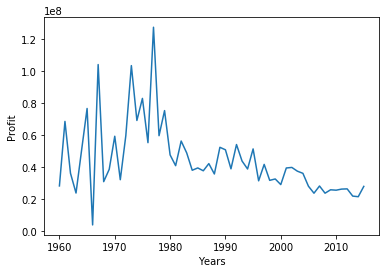

In [14]:
movie_data['profit'] = movie_data['revenue_adj'] - movie_data['budget_adj']
y_means = movie_data['profit'].groupby(movie_data['release_year']).mean()
plt.xlabel("Years")
plt.ylabel("Profit")
plt.plot(y_means.index, y_means)

由上图可知，基本上早发行的电影，其净利润更高。尤其在1980年之前，但波动非常大，参考历史不难发现，当时正处于经济危机。

---

**[选做]任务3.3：**选择最多产的10位导演（电影数量最多的），绘制他们排行前3的三部电影的票房情况，并简要进行分析。

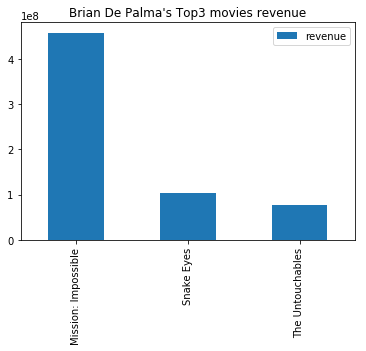

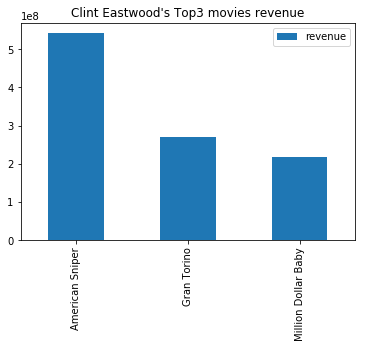

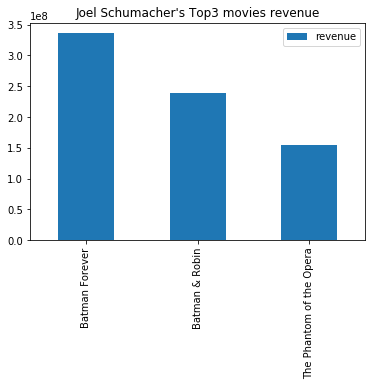

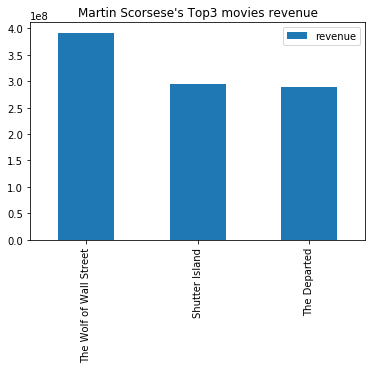

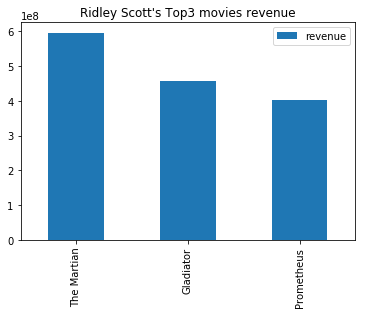

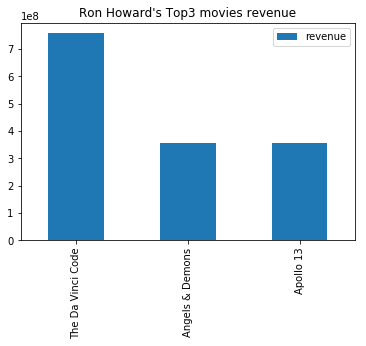

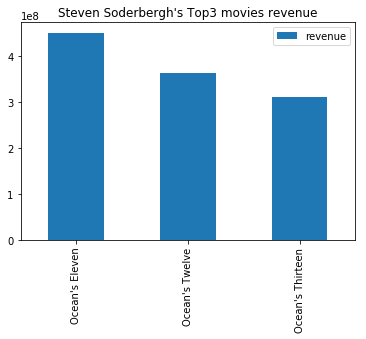

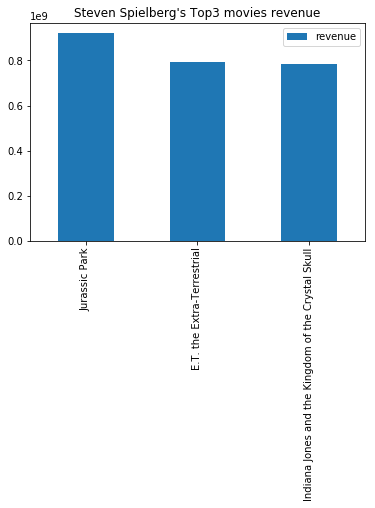

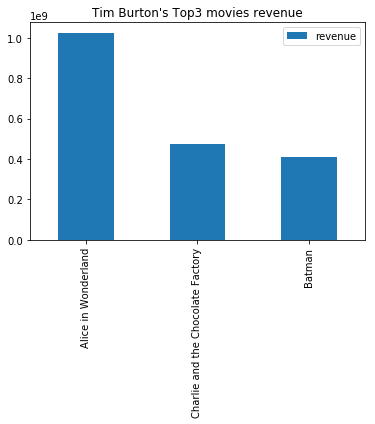

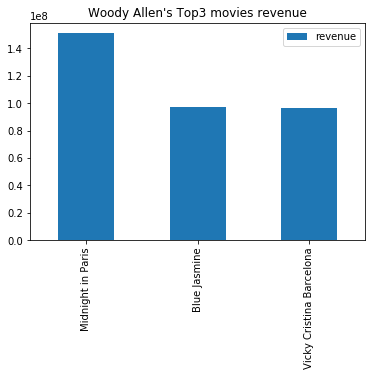

In [15]:
# director = movie_data.groupby(movie_data['director']).agg('size').sort_values(ascending=False)[0: 10]

# def getDirectorTop3():
#     directors_movie_data = pd.DataFrame(columns=movie_data.columns)
#     for dirs in director.index:
#         director_movie_data = movie_data[ movie_data['director'] == dirs ].sort_values(by='revenue_adj', ascending=False)[0: 3]
#         directors_movie_data = directors_movie_data.append(director_movie_data)
#     return directors_movie_data
    
# directors_movie_data = getDirectorTop3()
# sb.countplot(y = 'director', hue = 'original_title', data = directors_movie_data)

#new
movie_data_split = movie_data['director'].str.split('|', expand=True).stack() \
.reset_index(level=0).set_index('level_0') \
.rename(columns={0:'director'}).join(movie_data.drop('director', axis=1))

directors_top10 = movie_data_split['director'].value_counts().nlargest(10).index

top10_data = movie_data_split[movie_data_split['director'].isin(directors_top10)].set_index('original_title')
target_data = top10_data.groupby('director').agg({'revenue': lambda x: x.nlargest(3).to_dict()})

#display(target_data['revenue']['Clint Eastwood'])

for _director in target_data['revenue'].index:
    director3_movie_data = pd.DataFrame.from_dict(target_data['revenue'][_director], orient='index')
    director3_movie_data.rename(columns={0: 'revenue'}, inplace=True)
    director3_movie_data.plot.bar(title= _director + "'s Top3 movies revenue")
#a = pd.DataFrame.from_dict(target_data['revenue']['Clint Eastwood'], orient='index')
#a.rename(columns={0: 'revenue'}, inplace=True)
#display(a)
#a.plot.bar(title="director movies revenue")


---

**[选做]任务3.4：**分析1968年~2015年六月电影的数量的变化。

Text(0,0.5,'Circulation')

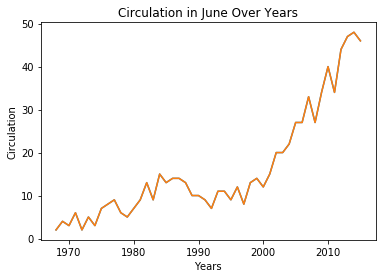

In [16]:
sixmonth_movie_data = movie_data[ movie_data['release_year'].between(1968, 2015) ]
def isJune(x):
    return x.split('/')[0] == '6'
sixmonth_movie_data = sixmonth_movie_data[sixmonth_movie_data['release_date'].apply(lambda x: isJune(x))]

y_means = sixmonth_movie_data.groupby(movie_data['release_year']).size()
plt.xlabel("Years")
plt.ylabel("Count")
plt.plot(y_means.index, y_means)
#print(sixmonth_movie_data)

#new
inJune = movie_data['release_date'].str.startswith('6')
inYears = movie_data['release_year'].between(1968, 2015)
movie_data[inJune&inYears]['release_year'].value_counts().sort_index().plot(title='Circulation in June Over Years')
plt.ylabel('Circulation')

---

**[选做]任务3.5：**分析1968年~2015年六月电影 `Comedy` 和 `Drama` 两类电影的数量的变化。

Text(0,0.5,'Circulation')

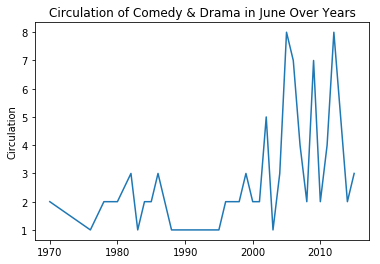

In [17]:
# import re
# def isComedyADrama(x):
#     if (re.search('Comedy|Drama', x, re.M|re.I) is None):
#         return False
#     return True
# sixmonth_comedyAdrama_movie_data = sixmonth_movie_data[sixmonth_movie_data['genres'].apply(lambda x: isComedyADrama(x))]

# def getCatetory(x):
#     isComedy = not re.search('Comedy', x) is None
#     isDrama = not re.search('Drama', x) is None
#     if isDrama and isComedy:
#         return 'Comedy|Drama'
#     if isComedy:
#         return 'Comedy'
#     if isDrama:
#         return 'Drama'

# # 这块warning按照文档提示修改过了，还是有。。。求助。
# #sixmonth_comedyAdrama_movie_data['category'] = sixmonth_comedyAdrama_movie_data['genres'].apply(lambda x: getCatetory(x))
# sixmonth_comedyAdrama_movie_data.loc[:, 'category'] = sixmonth_comedyAdrama_movie_data['genres'].apply(lambda x: getCatetory(x))
# #print(sixmonth_comedyAdrama_movie_data)
# sb.countplot(y = 'release_year', hue = 'category', data = sixmonth_comedyAdrama_movie_data)

# new

comedy = movie_data['genres'].str.contains('Comedy')
drama = movie_data['genres'].str.contains('Drama')
movie_data[inJune&inYears&comedy&drama]['release_year'].value_counts().sort_index().plot(title='Circulation of Comedy & Drama in June Over Years')
plt.ylabel('Circulation')

> 注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)、Python (.py)** 把导出的 HTML、python文件 和这个 iPython notebook 一起提交给审阅者。